In [1]:
%load_ext autoreload
%autoreload 2
import pickle as pkl
from glob import glob
from utils import get_data_loader

from utils.constants import SUPPORTED_IMAGENET_MODELS
from utils import get_imagenet_image_preproc_pipeline
from utils import get_imagenet_tensor_preproc_pipeline
from explainers.integrated_gradients import IntegratedGradientsExplainer
import utils.constants as cst
from utils.explainer_utils import convert_to_grayscale
from tqdm import tqdm 

In [3]:
!python run_explainers.py --end_idx 100 --model inception_v3 --explainer integrated_gradient --batch_size 7


Using cache found in /data/pytorch_pretrained_models/pytorch_vision_master
100%|███████████████████████████████████████████| 15/15 [00:15<00:00,  1.28it/s]
all done!


In [2]:
import torch

In [3]:
torch.cuda.is_available()

True

In [3]:
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
dl = get_data_loader(
            dataset="imagenet",
            model_name="inception_v3",
            data_dir= "/data/imagenet",
            batch_size=7,
            num_workers=2,
            transform=None,
            start_idx=0,
            end_idx=100,
            shuffle=True
        )


In [3]:
explainer = IntegratedGradientsExplainer("inception_v3",model_dir=cst.DEFAULT_MODEL_DIR)


Using cache found in /data/pytorch_pretrained_models/pytorch_vision_master


In [4]:
images = []
for image,label in tqdm(dl):
    res = explainer.explain_instances(image,label=None,steps=20)
    images.append(res)


100%|██████████| 15/15 [00:15<00:00,  1.28it/s]


In [10]:
res = explainer.explain_instances(image,label=None,steps=10)

In [9]:
res[1].shape

(299, 299)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


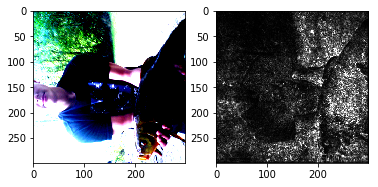

In [17]:
fig,ax = plt.subplots(ncols=2)
ax[0].imshow(image[1].permute(1,2,0).cpu().numpy())
ax[1].imshow(res[1], cmap='gray')

In [11]:
# explainer.explain_instances(image,label=label,steps=10)

# del explainer

# import torch

# torch.cuda.empty_cache()

# torch.cuda.device_count() 

# del image

# del label



# !echo $CUDA_VISIBLE_DEVICES


# files = glob("results/imagenet_resn*_translation_x*.pkl")
# files.sort()
# for f in files:
#     x = pkl.load(open(f, "rb"))
#     print(f, x["acc@1"])

# baseline_results

# x = pkl.load(open(baseline_results[0], "rb"))

# x["acc@1"]

# SUPPORTED_IMAGENET_MODELS